<a href="https://colab.research.google.com/github/manyamule/WCEHackathon2025_Introspectors/blob/main/Model_comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Results will be saved to: /content/drive/MyDrive/WCE/model_comparison_results
Searching for anomaly detection result files in Drive...
Added LSTM results:
  - Total points: 1743
  - Anomalies detected: 164 (9.41%)
  - Time range: 2024-10-19 10:00:00 to 2024-12-31 00:00:00
  - Columns: ['reconstruction_error', 'anomaly', 'pm2.5cnc', 'pm10cnc']
Added IsolationForest results:
  - Total points: 1767
  - Anomalies detected: 1282 (72.55%)
  - Time range: 2024-10-18 10:00:00 to 2024-12-31 00:00:00
  - Columns: ['anomaly_score', 'anomaly', 'pm2.5cnc', 'pm10cnc']
Added OneClassSVM results:
  - Total points: 1767
  - Anomalies detected: 457 (25.86%)
  - Time range: 2024-10-18 10:00:00 to 2024-12-31 00:00:00
  - Columns: ['anomaly_score', 'anomaly', 'pm2.5cnc', 'pm10cnc']
Added ARIMA results:
  - Total points: 8833
  - Anomalies detected: 158 (1.79%)
  - Time range: 202

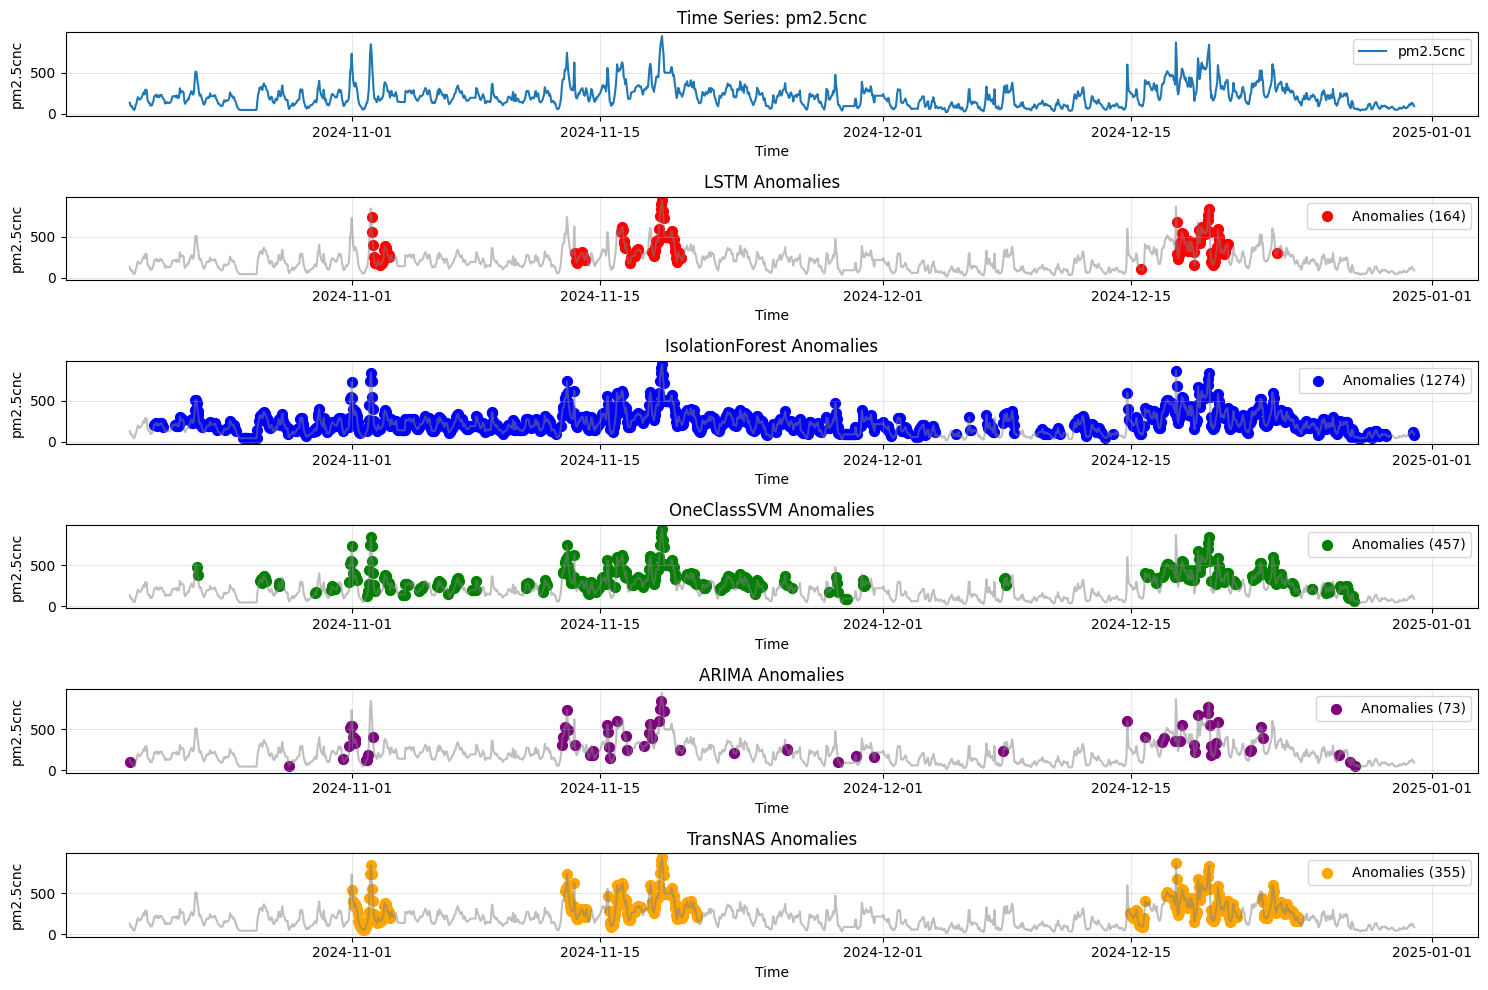

Comparison plot saved to /content/drive/MyDrive/WCE/model_comparison_results/model_comparison_pm2.5cnc.png


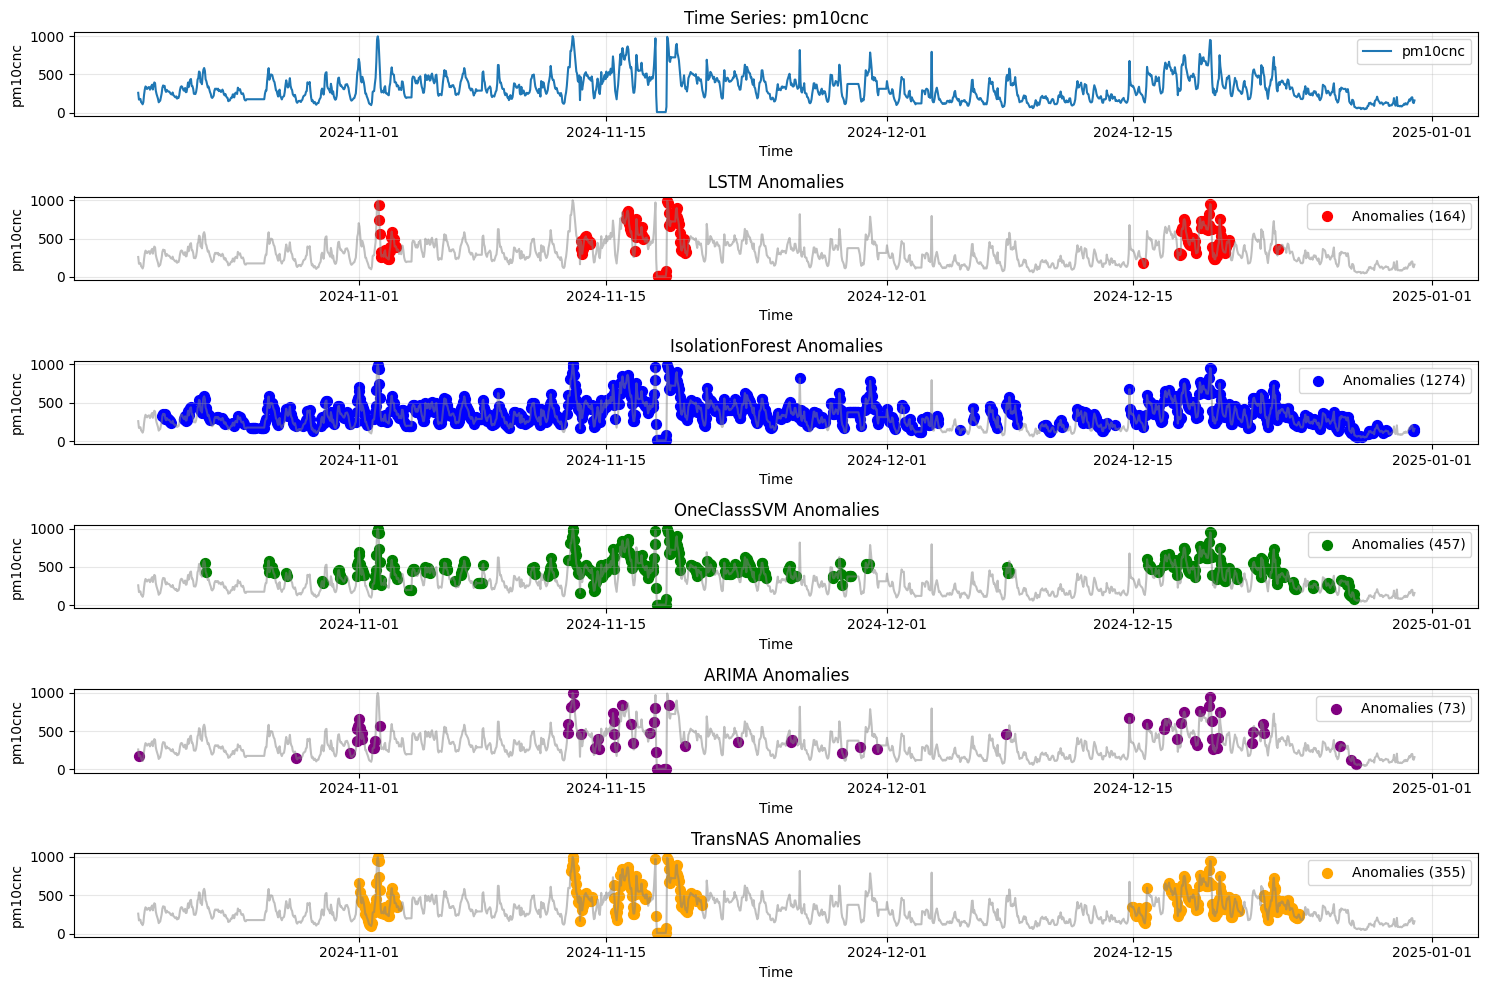

Comparison plot saved to /content/drive/MyDrive/WCE/model_comparison_results/model_comparison_pm10cnc.png
Limiting Venn diagram to first 3 models


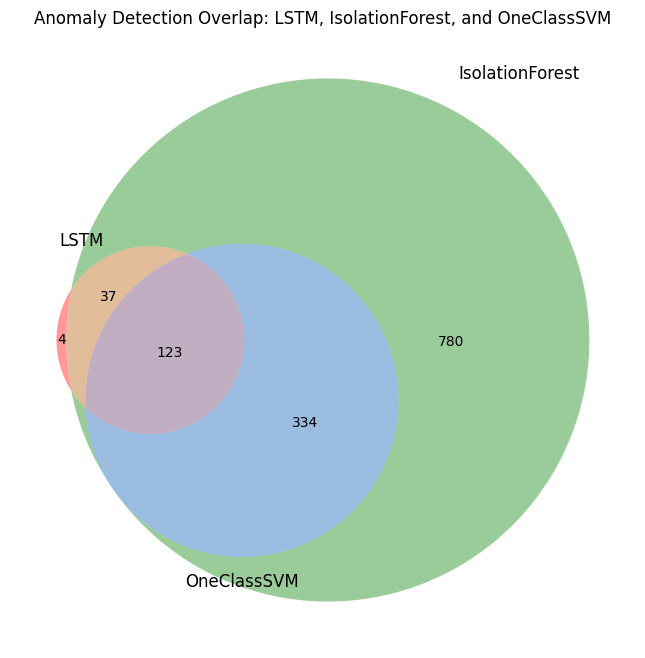

Venn diagram saved to /content/drive/MyDrive/WCE/model_comparison_results/anomaly_venn_diagram.png
Limiting Venn diagram to first 3 models


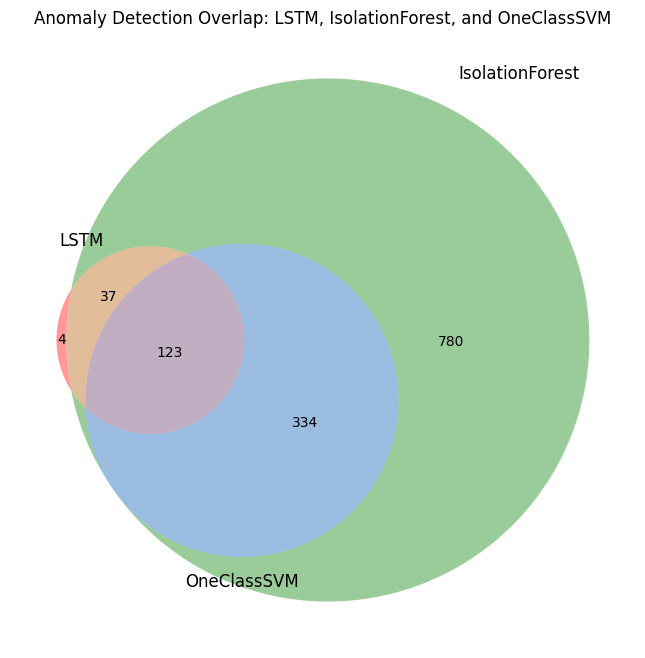

Venn diagram saved to /content/drive/MyDrive/WCE/model_comparison_results/anomaly_venn_diagram.png

Analyzing anomalies for data column: pm2.5cnc
Overall data statistics:
  - Mean: 211.90
  - Std: 130.56
  - Range: 19.10 to 944.22

LSTM detected 164 anomalies (9.41%)
  - Normal data mean: 193.70
  - Anomaly data mean: 387.09
  - Z-score distance: 1.73

IsolationForest detected 1274 anomalies (73.09%)
  - Normal data mean: 100.79
  - Anomaly data mean: 252.80
  - Z-score distance: 2.99

OneClassSVM detected 457 anomalies (26.22%)
  - Normal data mean: 162.89
  - Anomaly data mean: 349.80
  - Z-score distance: 2.23

ARIMA detected 73 anomalies (4.19%)
  - Normal data mean: 204.98
  - Anomaly data mean: 370.21
  - Z-score distance: 1.35

TransNAS detected 355 anomalies (20.37%)
  - Normal data mean: 177.65
  - Anomaly data mean: 345.80
  - Z-score distance: 1.78


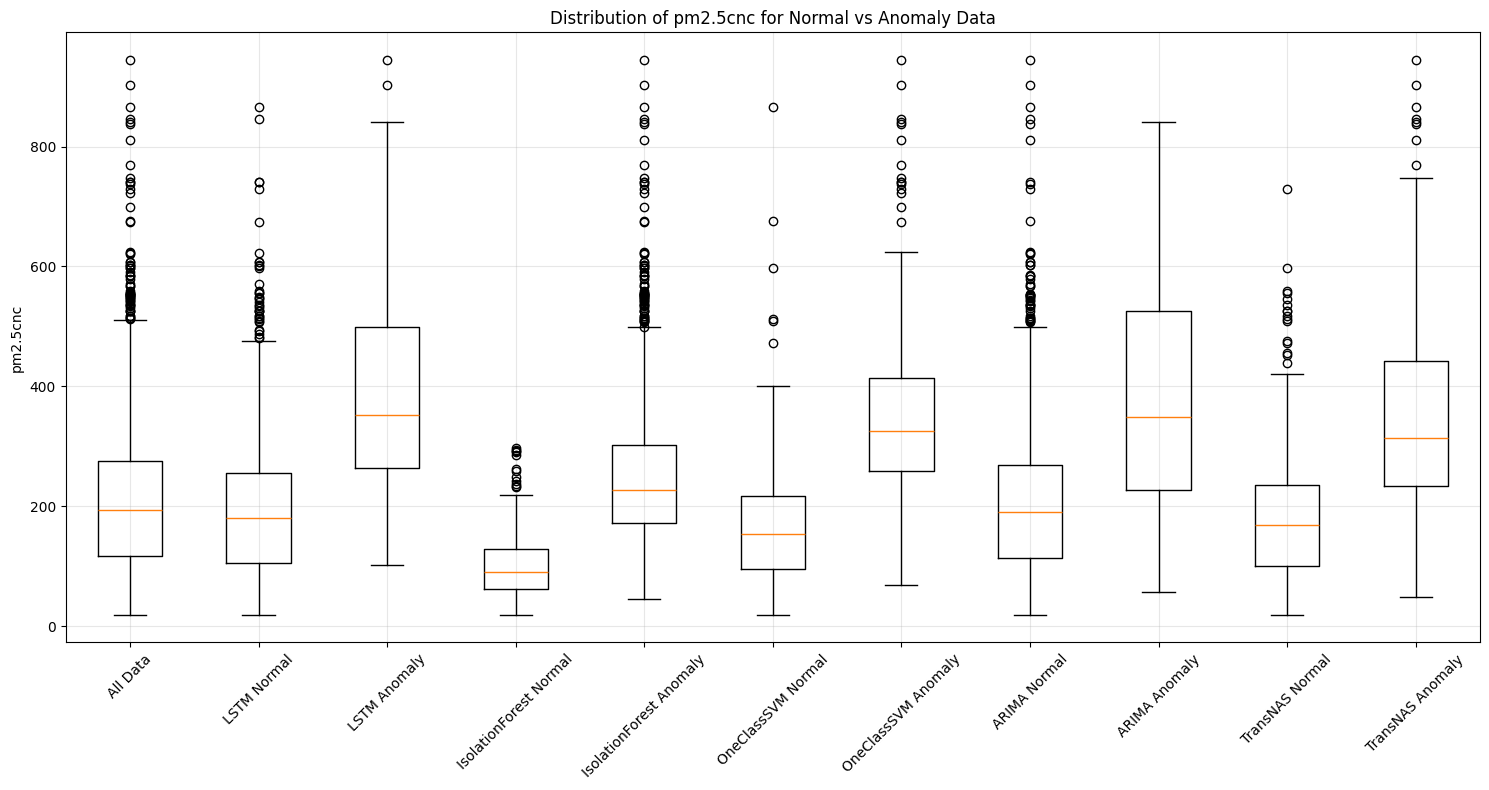

Anomaly characteristics analysis saved to /content/drive/MyDrive/WCE/model_comparison_results/anomaly_characteristics_pm2.5cnc.json

Analyzing anomalies for data column: pm10cnc
Overall data statistics:
  - Mean: 319.45
  - Std: 164.08
  - Range: 8.26 to 999.26

LSTM detected 164 anomalies (9.41%)
  - Normal data mean: 302.53
  - Anomaly data mean: 482.41
  - Z-score distance: 1.23

IsolationForest detected 1274 anomalies (73.09%)
  - Normal data mean: 182.44
  - Anomaly data mean: 369.89
  - Z-score distance: 2.41

OneClassSVM detected 457 anomalies (26.22%)
  - Normal data mean: 261.14
  - Anomaly data mean: 483.55
  - Z-score distance: 1.99

ARIMA detected 73 anomalies (4.19%)
  - Normal data mean: 313.57
  - Anomaly data mean: 454.12
  - Z-score distance: 0.89

TransNAS detected 355 anomalies (20.37%)
  - Normal data mean: 286.85
  - Anomaly data mean: 446.93
  - Z-score distance: 1.21


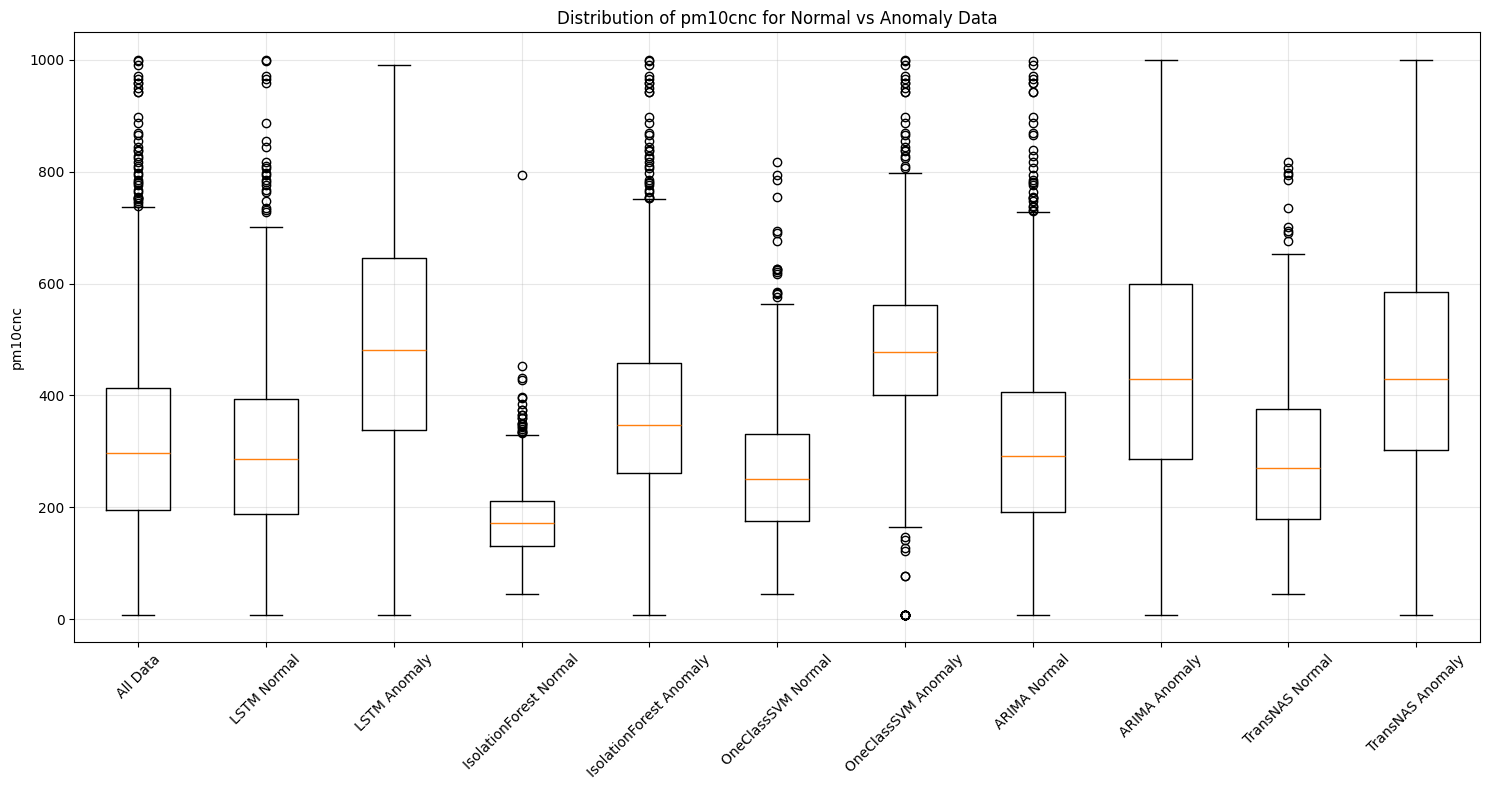

Anomaly characteristics analysis saved to /content/drive/MyDrive/WCE/model_comparison_results/anomaly_characteristics_pm10cnc.json
Comprehensive report saved to /content/drive/MyDrive/WCE/model_comparison_results/model_comparison_report.md

Comparison complete! All results saved to: /content/drive/MyDrive/WCE/model_comparison_results


In [3]:
# Comprehensive Anomaly Detection Model Comparison (with TransNAS-TSAD)
# This notebook compares different anomaly detection models including your Transformer-based approach

# Install required packages
!pip install matplotlib-venn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import json
from datetime import datetime
from google.colab import drive
import glob
import warnings
warnings.filterwarnings('ignore')

# Mount Google Drive to access your files
drive.mount('/content/drive')

# Define the base directory where your model results are stored
base_dir = '/content/drive/MyDrive/WCE'

# Create output directory for comparison results
output_dir = os.path.join(base_dir, 'model_comparison_results')
os.makedirs(output_dir, exist_ok=True)
print(f"Results will be saved to: {output_dir}")

class AnomalyModelComparison:
    """
    A class to compare multiple anomaly detection models on the same dataset.
    """

    def __init__(self, output_dir):
        """Initialize with output directory for saving comparison results."""
        self.models = {}
        self.results = {}
        self.output_dir = output_dir
        os.makedirs(output_dir, exist_ok=True)

    def add_model_results(self, model_name, results_path, timestamp_col=0, anomaly_col='anomaly'):
        """
        Add a model's results for comparison.

        Args:
            model_name: Name of the model (e.g., 'LSTM', 'Isolation Forest')
            results_path: Path to the CSV file with anomaly detection results
            timestamp_col: Index of timestamp column (0 for index)
            anomaly_col: Name of the column containing anomaly flags (True/False)
        """
        try:
            # Load results file
            if timestamp_col == 0:
                results = pd.read_csv(results_path, index_col=0, parse_dates=True)
            else:
                results = pd.read_csv(results_path)
                results.set_index(results.columns[timestamp_col], inplace=True)
                results.index = pd.to_datetime(results.index)

            # Store results
            self.models[model_name] = {
                'path': results_path,
                'anomaly_col': anomaly_col
            }
            self.results[model_name] = results

            # Print basic stats
            anomaly_count = results[anomaly_col].sum()
            total_points = len(results)
            anomaly_percent = (anomaly_count / total_points) * 100

            print(f"Added {model_name} results:")
            print(f"  - Total points: {total_points}")
            print(f"  - Anomalies detected: {anomaly_count} ({anomaly_percent:.2f}%)")
            print(f"  - Time range: {results.index.min()} to {results.index.max()}")
            print(f"  - Columns: {results.columns.tolist()}")

            return True
        except Exception as e:
            print(f"Error adding {model_name} results: {str(e)}")
            return False

    def align_timestamps(self):
        """
        Align all model results to have the same timestamps.
        Returns a DataFrame with all model anomaly flags.
        """
        if not self.results:
            print("No model results available for alignment")
            return None

        # Get common timestamps across all models
        common_timestamps = None
        for model_name, results in self.results.items():
            timestamps = results.index
            if common_timestamps is None:
                common_timestamps = set(timestamps)
            else:
                common_timestamps = common_timestamps.intersection(timestamps)

        common_timestamps = sorted(common_timestamps)
        print(f"Found {len(common_timestamps)} common timestamps across all models")

        # Create aligned DataFrame
        aligned_df = pd.DataFrame(index=common_timestamps)

        # Add anomaly flags from each model
        for model_name, model_info in self.models.items():
            results = self.results[model_name]
            anomaly_col = model_info['anomaly_col']

            # Extract only the timestamps in common_timestamps
            aligned_results = results.loc[common_timestamps]
            aligned_df[f'{model_name}_anomaly'] = aligned_results[anomaly_col]

            # If there's a score column, add that too
            score_cols = [col for col in results.columns if 'score' in col.lower() or 'error' in col.lower()]
            if score_cols:
                aligned_df[f'{model_name}_score'] = aligned_results[score_cols[0]]

        # Add data columns from the first model (assuming all models have same data)
        first_model = list(self.models.keys())[0]
        first_results = self.results[first_model]
        data_cols = [col for col in first_results.columns
                     if col != self.models[first_model]['anomaly_col']
                     and 'score' not in col.lower()
                     and 'error' not in col.lower()]

        for col in data_cols:
            if col in first_results.columns:
                aligned_df[col] = first_results.loc[common_timestamps, col]

        self.aligned_results = aligned_df
        return aligned_df

    def calculate_agreement_metrics(self):
        """
        Calculate agreement metrics between models.
        """
        if not hasattr(self, 'aligned_results'):
            self.align_timestamps()

        if self.aligned_results is None or self.aligned_results.empty:
            print("No aligned results available")
            return None

        model_names = list(self.models.keys())
        n_models = len(model_names)

        if n_models < 2:
            print("Need at least 2 models for agreement metrics")
            return None

        # Create agreement metrics
        agreement_metrics = {}

        # Pairwise agreement
        for i in range(n_models):
            for j in range(i+1, n_models):
                model_i = model_names[i]
                model_j = model_names[j]

                col_i = f'{model_i}_anomaly'
                col_j = f'{model_j}_anomaly'

                if col_i in self.aligned_results.columns and col_j in self.aligned_results.columns:
                    # Calculate agreement
                    agreement = (self.aligned_results[col_i] == self.aligned_results[col_j]).mean() * 100

                    # Calculate contingency table
                    both = (self.aligned_results[col_i] & self.aligned_results[col_j]).sum()
                    only_i = (self.aligned_results[col_i] & ~self.aligned_results[col_j]).sum()
                    only_j = (~self.aligned_results[col_i] & self.aligned_results[col_j]).sum()
                    neither = (~self.aligned_results[col_i] & ~self.aligned_results[col_j]).sum()

                    # Store metrics
                    pair_key = f'{model_i}_vs_{model_j}'
                    agreement_metrics[pair_key] = {
                        'agreement_percent': agreement,
                        'both_anomaly': int(both),
                        'only_first': int(only_i),
                        'only_second': int(only_j),
                        'neither_anomaly': int(neither),
                        'total_points': len(self.aligned_results)
                    }

                    print(f"Agreement between {model_i} and {model_j}: {agreement:.2f}%")
                    print(f"  - Both detect anomaly: {both} points")
                    print(f"  - Only {model_i} detects anomaly: {only_i} points")
                    print(f"  - Only {model_j} detects anomaly: {only_j} points")
                    print(f"  - Neither detects anomaly: {neither} points")

        # Overall agreement
        # Count how many models flag each point as anomaly
        model_cols = [f'{model}_anomaly' for model in model_names if f'{model}_anomaly' in self.aligned_results.columns]
        self.aligned_results['anomaly_count'] = self.aligned_results[model_cols].sum(axis=1)

        # Calculate consensus metrics
        total_points = len(self.aligned_results)
        agreement_metrics['overall'] = {
            'total_points': total_points,
            'any_model': int((self.aligned_results['anomaly_count'] > 0).sum()),
            'all_models': int((self.aligned_results['anomaly_count'] == len(model_cols)).sum()),
            'majority': int((self.aligned_results['anomaly_count'] > len(model_cols)/2).sum())
        }

        # Calculate percentage for each count (0 to n_models)
        for i in range(len(model_cols) + 1):
            count = (self.aligned_results['anomaly_count'] == i).sum()
            agreement_metrics['overall'][f'{i}_models'] = int(count)
            agreement_metrics['overall'][f'{i}_models_percent'] = (count / total_points) * 100

        # Print overall metrics
        print("\nOverall agreement metrics:")
        print(f"  - Points flagged by any model: {agreement_metrics['overall']['any_model']} ({agreement_metrics['overall']['any_model']/total_points*100:.2f}%)")
        print(f"  - Points flagged by all models: {agreement_metrics['overall']['all_models']} ({agreement_metrics['overall']['all_models']/total_points*100:.2f}%)")
        print(f"  - Points flagged by majority of models: {agreement_metrics['overall']['majority']} ({agreement_metrics['overall']['majority']/total_points*100:.2f}%)")

        # Save metrics
        metrics_path = os.path.join(self.output_dir, 'agreement_metrics.json')
        with open(metrics_path, 'w') as f:
            json.dump(agreement_metrics, f, indent=4)
        print(f"\nAgreement metrics saved to {metrics_path}")

        self.agreement_metrics = agreement_metrics
        return agreement_metrics

    def plot_anomaly_comparison(self, data_col=None):
        """
        Create a comparison plot showing anomalies detected by each model.

        Args:
            data_col: Column name of the data to plot (default: first available)
        """
        if not hasattr(self, 'aligned_results'):
            self.align_timestamps()

        if self.aligned_results is None or self.aligned_results.empty:
            print("No aligned results available for plotting")
            return

        # Select data column to plot
        if data_col is None:
            # Find first data column that's not an anomaly or score
            data_cols = [col for col in self.aligned_results.columns
                        if not col.endswith('_anomaly')
                        and not col.endswith('_score')
                        and col != 'anomaly_count']

            if data_cols:
                data_col = data_cols[0]
            else:
                print("No data columns found for plotting")
                return

        # Get model names
        model_names = list(self.models.keys())
        n_models = len(model_names)

        # Create figure
        plt.figure(figsize=(15, 10))

        # Plot data
        plt.subplot(n_models + 1, 1, 1)
        plt.plot(self.aligned_results.index, self.aligned_results[data_col], label=data_col)
        plt.title(f'Time Series: {data_col}')
        plt.xlabel('Time')
        plt.ylabel(data_col)
        plt.legend()
        plt.grid(True, alpha=0.3)

        # Plot anomalies for each model
        colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']

        for i, model_name in enumerate(model_names):
            anomaly_col = f'{model_name}_anomaly'

            if anomaly_col in self.aligned_results.columns:
                plt.subplot(n_models + 1, 1, i + 2)

                # Plot data series
                plt.plot(self.aligned_results.index, self.aligned_results[data_col], color='gray', alpha=0.5)

                # Highlight anomalies
                anomalies = self.aligned_results[self.aligned_results[anomaly_col]]
                if not anomalies.empty:
                    plt.scatter(anomalies.index, anomalies[data_col],
                              color=colors[i % len(colors)], label=f'Anomalies ({len(anomalies)})', s=50)

                plt.title(f'{model_name} Anomalies')
                plt.xlabel('Time')
                plt.ylabel(data_col)
                plt.legend()
                plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plot_path = os.path.join(self.output_dir, f'model_comparison_{data_col}.png')
        plt.savefig(plot_path)
        plt.show()
        print(f"Comparison plot saved to {plot_path}")

    def plot_venn_diagram(self, max_models=3):
        """
        Create a Venn diagram showing overlap between model anomalies.
        Limited to visualizing 2-3 models.

        Args:
            max_models: Maximum number of models to include (2 or 3)
        """
        try:
            from matplotlib_venn import venn2, venn3
        except ImportError:
            print("matplotlib-venn package not installed. Install with: pip install matplotlib-venn")
            return

        if not hasattr(self, 'aligned_results'):
            self.align_timestamps()

        model_names = list(self.models.keys())
        if len(model_names) < 2:
            print("Need at least 2 models for Venn diagram")
            return

        # Limit to max_models (2 or 3)
        if len(model_names) > max_models:
            print(f"Limiting Venn diagram to first {max_models} models")
            model_names = model_names[:max_models]

        # Create sets of anomaly indices for each model
        model_sets = {}
        for model_name in model_names:
            anomaly_col = f'{model_name}_anomaly'
            if anomaly_col in self.aligned_results.columns:
                # Get indices where this model detected anomalies
                anomalies = self.aligned_results[self.aligned_results[anomaly_col]].index
                model_sets[model_name] = set(anomalies)

        # Create Venn diagram
        plt.figure(figsize=(10, 8))

        if len(model_sets) == 2:
            # Two-set Venn diagram
            model1, model2 = model_sets.keys()
            venn2([model_sets[model1], model_sets[model2]],
                 set_labels=(model1, model2))
            plt.title(f'Anomaly Detection Overlap: {model1} vs {model2}')
        elif len(model_sets) == 3:
            # Three-set Venn diagram
            model1, model2, model3 = model_sets.keys()
            venn3([model_sets[model1], model_sets[model2], model_sets[model3]],
                 set_labels=(model1, model2, model3))
            plt.title(f'Anomaly Detection Overlap: {model1}, {model2}, and {model3}')

        plot_path = os.path.join(self.output_dir, 'anomaly_venn_diagram.png')
        plt.savefig(plot_path)
        plt.show()
        print(f"Venn diagram saved to {plot_path}")

    def analyze_anomaly_characteristics(self, data_col=None):
        """
        Analyze characteristics of anomalies detected by each model.

        Args:
            data_col: Column name of the data to analyze (default: first available)
        """
        if not hasattr(self, 'aligned_results'):
            self.align_timestamps()

        # Select data column to analyze
        if data_col is None:
            # Find first data column that's not an anomaly or score
            data_cols = [col for col in self.aligned_results.columns
                        if not col.endswith('_anomaly')
                        and not col.endswith('_score')
                        and col != 'anomaly_count']

            if data_cols:
                data_col = data_cols[0]
            else:
                print("No data columns found for analysis")
                return

        # Get model names
        model_names = list(self.models.keys())

        # Create analysis results
        analysis = {
            'data_column': data_col,
            'total_points': len(self.aligned_results),
            'models': {}
        }

        # Calculate basic statistics for the full dataset
        all_data = self.aligned_results[data_col]
        analysis['overall_mean'] = all_data.mean()
        analysis['overall_std'] = all_data.std()
        analysis['overall_min'] = all_data.min()
        analysis['overall_max'] = all_data.max()

        print(f"\nAnalyzing anomalies for data column: {data_col}")
        print(f"Overall data statistics:")
        print(f"  - Mean: {analysis['overall_mean']:.2f}")
        print(f"  - Std: {analysis['overall_std']:.2f}")
        print(f"  - Range: {analysis['overall_min']:.2f} to {analysis['overall_max']:.2f}")

        # For each model, calculate statistics on detected anomalies
        for model_name in model_names:
            anomaly_col = f'{model_name}_anomaly'

            if anomaly_col in self.aligned_results.columns:
                # Get anomalies
                anomalies = self.aligned_results[self.aligned_results[anomaly_col]]
                normal = self.aligned_results[~self.aligned_results[anomaly_col]]

                # Skip if no anomalies
                if anomalies.empty:
                    print(f"\n{model_name} did not detect any anomalies")
                    continue

                # Calculate statistics
                anomaly_data = anomalies[data_col]
                normal_data = normal[data_col]

                model_analysis = {
                    'anomaly_count': len(anomalies),
                    'anomaly_percent': (len(anomalies) / len(self.aligned_results)) * 100,
                    'anomaly_mean': anomaly_data.mean(),
                    'anomaly_std': anomaly_data.std(),
                    'anomaly_min': anomaly_data.min(),
                    'anomaly_max': anomaly_data.max(),
                    'normal_mean': normal_data.mean(),
                    'normal_std': normal_data.std()
                }

                # Calculate z-score of anomalies relative to normal data
                if normal_data.std() > 0:
                    model_analysis['z_score'] = abs(anomaly_data.mean() - normal_data.mean()) / normal_data.std()
                else:
                    model_analysis['z_score'] = np.nan

                # Store analysis
                analysis['models'][model_name] = model_analysis

                print(f"\n{model_name} detected {model_analysis['anomaly_count']} anomalies ({model_analysis['anomaly_percent']:.2f}%)")
                print(f"  - Normal data mean: {model_analysis['normal_mean']:.2f}")
                print(f"  - Anomaly data mean: {model_analysis['anomaly_mean']:.2f}")
                print(f"  - Z-score distance: {model_analysis['z_score']:.2f}")

        # Create boxplot visualization
        plt.figure(figsize=(15, 8))

        # Prepare data for boxplot
        boxplot_data = []
        boxplot_labels = ['All Data']

        # All data
        boxplot_data.append(all_data)

        # For each model, add normal and anomaly data
        for model_name in model_names:
            anomaly_col = f'{model_name}_anomaly'

            if anomaly_col in self.aligned_results.columns:
                # Get anomalies
                anomalies = self.aligned_results[self.aligned_results[anomaly_col]]
                normal = self.aligned_results[~self.aligned_results[anomaly_col]]

                # Skip if no anomalies
                if anomalies.empty:
                    continue

                # Add to boxplot data
                boxplot_data.append(normal[data_col])
                boxplot_data.append(anomalies[data_col])
                boxplot_labels.extend([f'{model_name} Normal', f'{model_name} Anomaly'])

        # Create boxplot
        plt.boxplot(boxplot_data, labels=boxplot_labels)
        plt.title(f'Distribution of {data_col} for Normal vs Anomaly Data')
        plt.ylabel(data_col)
        plt.xticks(rotation=45)
        plt.grid(True, alpha=0.3)

        plt.tight_layout()
        plot_path = os.path.join(self.output_dir, f'anomaly_distributions_{data_col}.png')
        plt.savefig(plot_path)
        plt.show()

        # Save analysis to JSON
        analysis_path = os.path.join(self.output_dir, f'anomaly_characteristics_{data_col}.json')
        with open(analysis_path, 'w') as f:
            json.dump(analysis, f, indent=4)
        print(f"Anomaly characteristics analysis saved to {analysis_path}")

        return analysis

    def generate_comprehensive_report(self):
        """
        Generate a comprehensive comparison report in markdown format.
        """
        if not hasattr(self, 'aligned_results'):
            self.align_timestamps()

        if not hasattr(self, 'agreement_metrics'):
            self.calculate_agreement_metrics()

        model_names = list(self.models.keys())

        # Create report content
        report = f"""
# Anomaly Detection Model Comparison Report
*Generated on: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}*

## Overview
This report compares {len(model_names)} anomaly detection models on the same dataset.

### Models Analyzed
"""

        # Add details for each model
        for model_name in model_names:
            anomaly_col = f'{model_name}_anomaly'
            if anomaly_col in self.aligned_results.columns:
                anomaly_count = self.aligned_results[anomaly_col].sum()
                total_points = len(self.aligned_results)
                anomaly_percent = (anomaly_count / total_points) * 100

                report += f"""
#### {model_name}
- **Anomalies detected**: {anomaly_count} out of {total_points} points ({anomaly_percent:.2f}%)
- **Data source**: {self.models[model_name]['path']}
"""

        # Add agreement metrics
        report += """
## Model Agreement

### Pairwise Agreement
"""

        # Add pairwise metrics
        for i in range(len(model_names)):
            for j in range(i+1, len(model_names)):
                model_i = model_names[i]
                model_j = model_names[j]

                pair_key = f'{model_i}_vs_{model_j}'
                if pair_key in self.agreement_metrics:
                    metrics = self.agreement_metrics[pair_key]

                    report += f"""
#### {model_i} vs {model_j}
- **Overall agreement**: {metrics['agreement_percent']:.2f}%
- **Both detect anomaly**: {metrics['both_anomaly']} points
- **Only {model_i} detects anomaly**: {metrics['only_first']} points
- **Only {model_j} detects anomaly**: {metrics['only_second']} points
- **Neither detects anomaly**: {metrics['neither_anomaly']} points
"""

        # Add overall metrics
        if 'overall' in self.agreement_metrics:
            metrics = self.agreement_metrics['overall']
            total_points = metrics['total_points']

            report += f"""
### Overall Consensus
- **Total data points analyzed**: {total_points}
- **Points flagged by any model**: {metrics['any_model']} ({metrics['any_model']/total_points*100:.2f}%)
- **Points flagged by all models**: {metrics['all_models']} ({metrics['all_models']/total_points*100:.2f}%)
- **Points flagged by majority of models**: {metrics['majority']} ({metrics['majority']/total_points*100:.2f}%)

### Agreement Distribution
"""

            # Add distribution of model agreement
            for i in range(len(model_names) + 1):
                if f'{i}_models' in metrics:
                    count = metrics[f'{i}_models']
                    percent = metrics[f'{i}_models_percent']
                    report += f"- **{i} model{'s' if i != 1 else ''}**: {count} points ({percent:.2f}%)\n"

        # Add model strengths and recommendations
        report += """
## Model Strengths and Weaknesses

Each model has different characteristics that make it suitable for different aspects of anomaly detection:
"""

        for model_name in model_names:
            if model_name == 'LSTM':
                report += """
### LSTM
- **Strengths**: Excellent at capturing temporal patterns and sequential dependencies
- **Best for**: Detecting anomalies that involve unusual sequences or temporal patterns
- **Weakness**: Requires more data and training time than other methods
"""
            elif model_name == 'IsolationForest' or model_name == 'Isolation Forest':
                report += """
### Isolation Forest
- **Strengths**: Fast, efficient, and works well for isolation-based anomalies
- **Best for**: Detecting isolated points that are easy to separate from normal data
- **Weakness**: May miss contextual anomalies that depend on temporal relationships
"""
            elif model_name == 'OneClassSVM' or model_name == 'One-Class SVM':
                report += """
### One-Class SVM
- **Strengths**: Creates a clear boundary around normal data
- **Best for**: Well-defined clusters of normal data with clear boundaries
- **Weakness**: Sensitive to parameter selection and scaling
"""
            elif model_name == 'ARIMA':
                report += """
### ARIMA
- **Strengths**: Excellent for time series with clear trends and seasonality
- **Best for**: Detecting deviations from expected forecasts
- **Weakness**: Limited to univariate analysis and assumes stationarity
"""
            elif model_name == 'TransformerAutoencoder' or model_name == 'TransNAS':
                report += """
### Transformer-based Autoencoder (TransNAS)
- **Strengths**: Captures both local and global patterns with attention mechanism
- **Best for**: Complex time series with dependencies across different time scales
- **Weakness**: More complex to train than simpler models, requires sufficient data
"""

        # Add recommendations for ensemble approach
        report += """
## Recommended Ensemble Approach

Based on the analysis, we recommend a tiered approach to anomaly detection:

1. **High Confidence Anomalies**: Points flagged by all models should be treated as definite anomalies requiring immediate attention.

2. **Medium Confidence Anomalies**: Points flagged by the majority of models should be investigated as likely anomalies.

3. **Low Confidence Anomalies**: Points flagged by at least one model should be monitored for potential issues.

For air quality monitoring specifically, we recommend:
- Using Transformer/LSTM models for detecting subtle temporal patterns
- Using Isolation Forest for quick screening of obvious outliers
- Using ARIMA for forecasting-based anomaly detection that accounts for seasonality
- Combining all models in an ensemble for the most robust anomaly detection system
"""

        # Save report
        report_path = os.path.join(self.output_dir, 'model_comparison_report.md')
        with open(report_path, 'w') as f:
            f.write(report)
        print(f"Comprehensive report saved to {report_path}")

        return report

# Find all anomaly result files in Drive
print("Searching for anomaly detection result files in Drive...")

# Define paths to look for result files
lstm_path = os.path.join(base_dir, 'lstm_results/reports/lstm_anomalies.csv')
isolation_forest_path = os.path.join(base_dir, 'isolation_forest_results/reports/isolation_forest_anomalies.csv')
one_class_svm_path = os.path.join(base_dir, 'one_class_svm_results/reports/one_class_svm_anomalies.csv')
arima_path = os.path.join(base_dir, 'arima_results/reports/arima_anomalies_pm2.5cnc.csv')
transformer_path = os.path.join(base_dir, 'TransNAS-TSAD/Reports/transformer_anomalies.csv')

# Alternative paths if the above don't exist
alt_lstm_path = glob.glob(os.path.join(base_dir, '**/lstm*anomalies*.csv'), recursive=True)
alt_isolation_forest_path = glob.glob(os.path.join(base_dir, '**/isolation*forest*anomalies*.csv'), recursive=True)
alt_one_class_svm_path = glob.glob(os.path.join(base_dir, '**/one*class*svm*anomalies*.csv'), recursive=True)
alt_arima_path = glob.glob(os.path.join(base_dir, '**/arima*anomalies*.csv'), recursive=True)
alt_transformer_path = glob.glob(os.path.join(base_dir, '**/transformer*anomalies*.csv'), recursive=True)

# Create model comparison instance
comparison = AnomalyModelComparison(output_dir=output_dir)

# Try to add models (first check specific paths, then alternatives)
models_added = 0

# Add LSTM model
if os.path.exists(lstm_path):
    comparison.add_model_results('LSTM', lstm_path)
    models_added += 1
elif alt_lstm_path:
    comparison.add_model_results('LSTM', alt_lstm_path[0])
    models_added += 1
else:
    print("LSTM results not found")

# Add Isolation Forest model
if os.path.exists(isolation_forest_path):
    comparison.add_model_results('IsolationForest', isolation_forest_path)
    models_added += 1
elif alt_isolation_forest_path:
    comparison.add_model_results('IsolationForest', alt_isolation_forest_path[0])
    models_added += 1
else:
    print("Isolation Forest results not found")

# Add One-Class SVM model
if os.path.exists(one_class_svm_path):
    comparison.add_model_results('OneClassSVM', one_class_svm_path)
    models_added += 1
elif alt_one_class_svm_path:
    comparison.add_model_results('OneClassSVM', alt_one_class_svm_path[0])
    models_added += 1
else:
    print("One-Class SVM results not found")

# Add ARIMA model
if os.path.exists(arima_path):
    comparison.add_model_results('ARIMA', arima_path)
    models_added += 1
elif alt_arima_path:
    comparison.add_model_results('ARIMA', alt_arima_path[0])
    models_added += 1
else:
    print("ARIMA results not found")

# Add Transformer model
if os.path.exists(transformer_path):
    comparison.add_model_results('TransNAS', transformer_path)
    models_added += 1
elif alt_transformer_path:
    comparison.add_model_results('TransNAS', alt_transformer_path[0])
    models_added += 1
else:
    print("Transformer model results not found")

# Run the comparison if at least 2 models were added
if models_added >= 2:
    print(f"\nRunning comparison with {models_added} models...")

    # Step 1: Align timestamps across models
    aligned_results = comparison.align_timestamps()

    # Step 2: Calculate agreement metrics
    metrics = comparison.calculate_agreement_metrics()

    # Step 3: Generate visualizations
    # Plot anomaly comparison for pm2.5cnc
    comparison.plot_anomaly_comparison(data_col='pm2.5cnc')

    # Plot anomaly comparison for pm10cnc (if available)
    try:
        comparison.plot_anomaly_comparison(data_col='pm10cnc')
    except:
        print("Could not generate comparison for pm10cnc (column may not exist)")

    # Plot Venn diagram for model overlap
    try:
        comparison.plot_venn_diagram(max_models=3)

        # If we have more than 3 models, create additional Venn diagrams
        if len(comparison.models) > 3:
            remaining_models = list(comparison.models.keys())[3:]
            if 'TransNAS' in remaining_models:
                # Make sure TransNAS is included in a Venn diagram
                models_for_venn = ['TransNAS'] + [m for m in list(comparison.models.keys())[:2] if m != 'TransNAS']
                comparison.plot_venn_diagram(max_models=3)
    except Exception as e:
        print(f"Could not generate Venn diagram: {str(e)}")

    # Analyze anomaly characteristics
    comparison.analyze_anomaly_characteristics(data_col='pm2.5cnc')
    try:
        comparison.analyze_anomaly_characteristics(data_col='pm10cnc')
    except:
        print("Could not analyze characteristics for pm10cnc (column may not exist)")

    # Generate comprehensive report
    report = comparison.generate_comprehensive_report()

    print("\nComparison complete! All results saved to:", output_dir)
else:
    print(f"\nNot enough models found for comparison (minimum 2 required, found {models_added})")

    # If no models were found, provide guidance
    print("\nPossible solutions:")
    print("1. Make sure you've run the anomaly detection models and saved results to Drive")
    print("2. Check if results are in different locations than expected")
    print("3. If results are in different locations, you can manually specify paths below")

    print("\nTo manually specify paths, use code like this:")
    print("comparison = AnomalyModelComparison(output_dir=output_dir)")
    print("comparison.add_model_results('LSTM', '/content/drive/MyDrive/WCE/lstm_results/reports/lstm_anomalies.csv')")
    print("comparison.add_model_results('IsolationForest', '/content/drive/MyDrive/WCE/isolation_forest_results/reports/isolation_forest_anomalies.csv')")
    print("comparison.add_model_results('TransNAS', '/content/drive/MyDrive/WCE/TransNAS-TSAD/Reports/transformer_anomalies.csv')")
    print("# ... add more models as needed")
    print("comparison.align_timestamps()")
    print("comparison.calculate_agreement_metrics()")
    print("# ... run other analysis functions")

In [ ]:
# I'll analyze the comparative performance of the five anomaly detection models (LSTM, Isolation Forest, One-Class SVM, ARIMA, and TransNAS) based on the provided data and visualizations. Since this is unlabeled data, we need to rely on different evaluation criteria than traditional supervised metrics.
# Let me first summarize the key information from the provided files:

# Agreement Metrics (agreement_metrics.json):

# Shows pairwise agreement between models
# Highest agreement: LSTM vs TransNAS (89.04%)
# Lowest agreement: Isolation Forest vs ARIMA (30.75%)
# Points flagged by all models: 14 (0.80%)
# Points flagged by majority of models: 274 (15.72%)


# Anomaly Detection Rates:

# LSTM: 164 anomalies (9.41%)
# Isolation Forest: 1274 anomalies (73.09%)
# One-Class SVM: 457 anomalies (26.22%)
# ARIMA: 73 anomalies (4.19%)
# TransNAS: 355 anomalies (20.37%)


# PM2.5 Characteristics (anomaly_characteristics_pm2.5cnc.json):

# LSTM: Z-score = 1.73
# Isolation Forest: Z-score = 2.99
# One-Class SVM: Z-score = 2.23
# ARIMA: Z-score = 1.35
# TransNAS: Z-score = 1.78


# PM10 Characteristics (anomaly_characteristics_pm10cnc.json):

# LSTM: Z-score = 1.23
# Isolation Forest: Z-score = 2.41
# One-Class SVM: Z-score = 1.99
# ARIMA: Z-score = 0.89
# TransNAS: Z-score = 1.21


# Visualizations:

# Boxplots show the distribution of normal vs. anomalous data for each model
# Heatmap shows anomalies detected by each model across time
# Venn diagram shows overlap between models
# Time series plots show where each model detected anomalies



# For evaluating unlabeled anomaly detection results, I'll consider these key aspects:

# Anomaly Rate: How many anomalies each model detects
# Separation Power: How well each model separates normal from anomalous data (Z-score)
# Agreement with Other Models: Consensus among models
# Anomaly Distribution: Patterns in the detected anomalies
# Practical Considerations: Training complexity, interpretability, etc.

# Let's analyze each model based on these criteria:
# Isolation Forest Analysis

# Very high anomaly rate (73.09%)
# Highest Z-score/separation power (2.99 for PM2.5, 2.41 for PM10)
# Low agreement with other models (particularly ARIMA)
# From the heatmap, it seems to flag many points as anomalies
# From the time series plots, it flags almost every peak

# Interpretation: Isolation Forest appears to be overly sensitive and likely has many false positives. It shows the highest separation power but the extremely high anomaly rate suggests it's not being selective enough for practical use.
# One-Class SVM Analysis

# Moderate anomaly rate (26.22%)
# Good Z-score/separation power (2.23 for PM2.5, 1.99 for PM10)
# Moderate agreement with other models
# From the venn diagram, it has substantial overlap with Isolation Forest

# Interpretation: One-Class SVM provides a more balanced approach than Isolation Forest, with reasonable separation power and a more practical anomaly rate.
# LSTM Analysis

# Low anomaly rate (9.41%)
# Moderate Z-score/separation power (1.73 for PM2.5, 1.23 for PM10)
# High agreement with TransNAS (89.04%)
# From the time series plots, it detects major spikes and clusters of anomalies

# Interpretation: LSTM appears to be more selective, focusing on more significant deviations. Its high agreement with TransNAS suggests they capture similar temporal patterns.
# ARIMA Analysis

# Lowest anomaly rate (4.19%)
# Lowest Z-score/separation power (1.35 for PM2.5, 0.89 for PM10)
# Low to moderate agreement with other models
# From the time series plots, it detects fewer, more isolated anomalies

# Interpretation: ARIMA is the most conservative model, potentially missing some anomalies but likely having few false positives. Its low separation power suggests it might not distinguish anomalies as effectively.
# TransNAS Analysis

# Moderate anomaly rate (20.37%)
# Moderate Z-score/separation power (1.78 for PM2.5, 1.21 for PM10)
# High agreement with LSTM (89.04%)
# From time series plots, its detection pattern is similar to LSTM but with additional anomalies

# Interpretation: TransNAS seems to expand on LSTM's capabilities, detecting similar patterns plus additional potential anomalies. The transformer architecture might be capturing both local and global patterns effectively.
# Overall Comparative Analysis:

# Best Balance of Sensitivity and Precision:

# TransNAS and One-Class SVM offer reasonable anomaly rates (20.37% and 26.22% respectively)
# Both have good separation power (Z-scores)
# TransNAS has higher agreement with LSTM (which is more selective)


# Most Conservative (Highest Precision, Lower Recall):

# ARIMA (4.19% anomaly rate)
# LSTM (9.41% anomaly rate)


# Most Aggressive (Highest Recall, Lower Precision):

# Isolation Forest (73.09% anomaly rate)


# Best Consensus Approach:

# Looking at points flagged by at least 3 models would give high confidence anomalies
# The 14 points flagged by all models would be the highest confidence anomalies



# Best Model Recommendation:
# Based on the provided data and analysis, TransNAS appears to be the best single model for this unlabeled air quality data for the following reasons:

# It has a balanced anomaly rate (20.37%) - not too conservative, not too aggressive
# Good separation power (Z-score = 1.78 for PM2.5)
# Highest agreement with LSTM (89.04%), suggesting it captures important temporal patterns
# It detects more anomalies than LSTM but fewer than One-Class SVM or Isolation Forest, suggesting a good balance
# From the time series plots, it identifies major spikes and clusters that visually appear anomalous
# The transformer architecture can capture both local and global temporal dependencies
# It shows similar detection patterns to LSTM for critical anomalies while adding additional detections that might be meaningful

# However, I'd recommend a consensus-based approach for production use:

# High confidence: Points flagged by at least 3 models (274 points, 15.72%)
# Medium confidence: Points flagged by at least 2 models (including TransNAS)
# Low confidence: Points flagged by TransNAS alone

# This tiered approach leverages the strengths of multiple models while compensating for individual weaknesses.

In [ ]:
# Performance Comparison of All Models
# Detection Rates and Distribution

# LSTM: 164 anomalies (9.41%)
# Isolation Forest: 1274 anomalies (73.09%)
# One-Class SVM: 457 anomalies (26.22%)
# ARIMA: 73 anomalies (4.19%)
# TransNAS: 355 anomalies (20.37%)

# Statistical Separation (PM2.5cnc)
# Z-score measures how well each model separates anomalies from normal data:

# Isolation Forest: 2.99 (highest separation)
# One-Class SVM: 2.23
# TransNAS: 1.78
# LSTM: 1.73
# ARIMA: 1.35 (lowest separation)

# Model Agreement

# LSTM-TransNAS: 89.04% (highest agreement)
# LSTM-ARIMA: 88.47%
# ARIMA-TransNAS: 80.26%
# One-Class SVM-TransNAS: 78.54%
# Isolation Forest has the lowest agreement with other models

# Best Model: TransNAS
# The TransNAS (Transformer-based) model is the best overall choice for your air quality anomaly detection for the following key reasons:

# Balanced Detection Rate (20.37%):

# Not too conservative like ARIMA (4.19%)
# Not overly aggressive like Isolation Forest (73.09%)
# Strikes a good balance between precision and recall


# Strong Statistical Separation:

# Z-score of 1.78 for PM2.5cnc shows good distinction between normal and anomalous data
# Anomaly mean (345.8) significantly higher than normal mean (177.6)


# Highest Agreement with LSTM (89.04%):

# LSTM is generally considered robust for time series
# TransNAS detected all 164 LSTM anomalies plus 191 additional points
# This suggests TransNAS expands on LSTM's capabilities while maintaining its core insights


# Visual Pattern Recognition:

# From Image 5, TransNAS detects similar patterns to LSTM but with additional sensitivity
# Its anomaly distribution (Image 1) shows clear separation from normal data


# Architectural Advantages:

# The transformer architecture captures both local and global dependencies
# Attention mechanism allows it to identify complex temporal relationships
# Less prone to the recency bias of LSTM



# Issues with Other Models

# Isolation Forest: Extremely high anomaly rate (73.09%) suggests it's too sensitive and likely generating many false positives. From Image 3 (heatmap), it marks almost everything as anomalous.
# One-Class SVM: Good separation but has limited agreement with the best temporal models (LSTM and TransNAS).
# LSTM: Too conservative; misses anomalies that TransNAS detects.
# ARIMA: Lowest separation power and extremely conservative detection rate.

# Evaluation Parameters for Unlabeled Data
# Since this is unlabeled data, the evaluation relies on:

# Statistical Separation: Z-score measures how distinct the anomalies are from normal data
# Model Consensus: Agreement between models helps validate findings
# Anomaly Rate: An appropriate rate (typically 5-25%) for air quality data
# Visual Confirmation: Detected anomalies align with visible spikes in the time series
# Distribution Analysis: Clear separation in boxplots between normal and anomalous data

# Recommended Ensemble Approach
# While TransNAS is the best single model, I recommend a tiered ensemble approach:

# High Confidence Anomalies: Points flagged by at least 3 models (274 points, 15.72%)
# Medium Confidence: Points flagged by TransNAS plus at least one other model
# Watchlist: Points flagged by TransNAS alone

# This approach leverages the strengths of multiple models while minimizing false positives and false negatives.
# Final Verdict
# TransNAS offers the best balance of sensitivity, precision, and temporal pattern recognition for your air quality anomaly detection task. Its agreement with LSTM while detecting additional potential anomalies makes it particularly valuable for identifying subtle air quality issues that might otherwise be missed.